In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

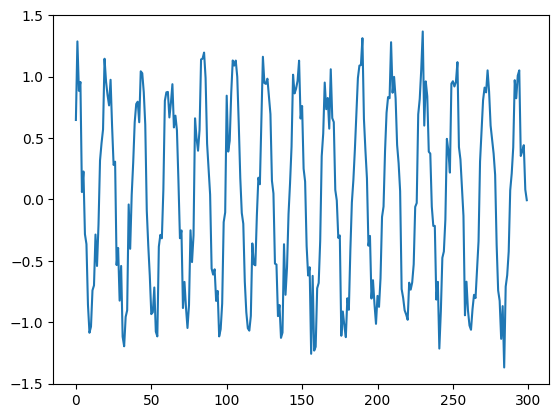

In [ ]:
s = np.cos(0.3 * np.arange(300)) + np.random.randn(300) * 0.2

plt.plot(s)

In [ ]:

T = 10
D = 1
X = []
Y = []
for t in range(len(s) - T):
  x = s[t:t+T]
  print("t = ",t, "x = ", x)
  print("=========================================================================")
  X.append(x)
  print("X = ",X, np.shape(X))
  y = s[t+T]
  print("=========================================================================")
  print("y = ",y)
  Y.append(y)
  print("=========================================================================")
  print("Y =",np.shape(Y))

print("Xshape = ", np.shape(X))

Streaming output truncated to the last 5000 lines.
        0.44372272,  0.29442105,  0.06764979, -0.7301324 , -0.80088633]), array([ 1.27954026,  0.86821857,  0.99713375,  0.82378235,  0.44372272,
        0.29442105,  0.06764979, -0.7301324 , -0.80088633, -0.90341051]), array([ 0.86821857,  0.99713375,  0.82378235,  0.44372272,  0.29442105,
        0.06764979, -0.7301324 , -0.80088633, -0.90341051, -0.93717166]), array([ 0.99713375,  0.82378235,  0.44372272,  0.29442105,  0.06764979,
       -0.7301324 , -0.80088633, -0.90341051, -0.93717166, -0.9801977 ]), array([ 0.82378235,  0.44372272,  0.29442105,  0.06764979, -0.7301324 ,
       -0.80088633, -0.90341051, -0.93717166, -0.9801977 , -0.67846434]), array([ 0.44372272,  0.29442105,  0.06764979, -0.7301324 , -0.80088633,
       -0.90341051, -0.93717166, -0.9801977 , -0.67846434, -0.73514812]), array([ 0.29442105,  0.06764979, -0.7301324 , -0.80088633, -0.90341051,
       -0.93717166, -0.9801977 , -0.67846434, -0.73514812, -0.67676988]),

In [ ]:
X = np.array(X).reshape(-1, T, 1) # Data shape is N * T * D
Y = np.array(Y)
N = len(X)
print("X.shape = ", X.shape, "Y.shape = ", Y.shape)

X.shape =  (290, 10, 1) Y.shape =  (290,)


In [ ]:
i = Input(shape = (T, 1))
x = SimpleRNN(10, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse',
              optimizer = Adam(lr = 0.1))
r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data = (X[-N//2:], Y[-N//2:]),
     epochs = 100)

Epoch 1/100
5/5 [==============================] - 2s 96ms/step - loss: 3.8063 - val_loss: 3.6981
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 3.0760 - val_loss: 3.0534
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 2.5556 - val_loss: 2.5659
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 2.1607 - val_loss: 2.1951
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 1.8604 - val_loss: 1.9086
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 1.6089 - val_loss: 1.6856
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 1.4359 - val_loss: 1.4971
Epoch 8/100
5/5 [==============================] - 0s 16ms/step - loss: 1.2755 - val_loss: 1.3459
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 1.1467 - val_loss: 1.2176
Epoch 10/100
5/5 [==============================] - 0s 14ms/step - loss: 1.0372 - val_loss: 1.1049
Epoch 11/100
5/5 [=

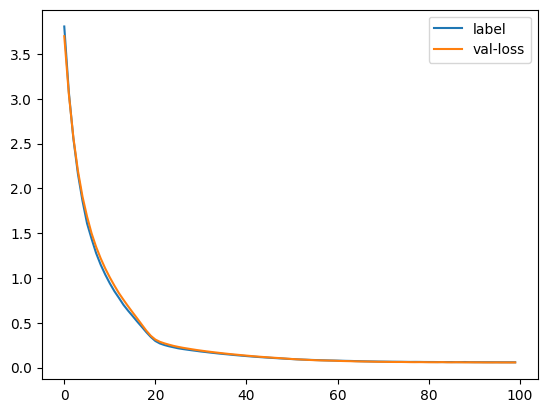

In [ ]:
plt.plot(r.history['loss'], label = 'label')
plt.plot(r.history['val_loss'], label = 'val-loss')
plt.legend()

1/1 [==============================] - 0s 24ms/step


AttributeError: Line2D.set() got an unexpected keyword argument 'Label'

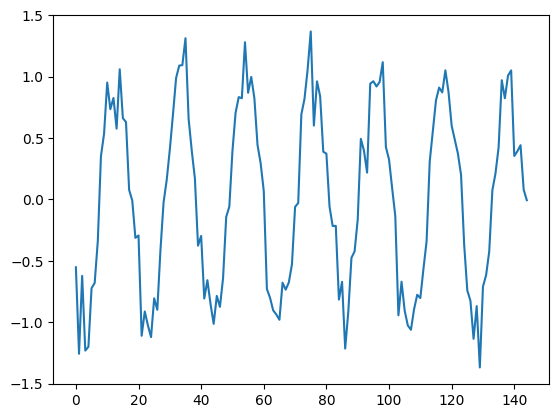

In [ ]:
from prompt_toolkit.shortcuts.dialogs import Label
valid_target = Y[-N // 2:]
predict_list = []
train_input = X[-N // 2]
while len(predict_list)< len(valid_target):
  p = model.predict(train_input.reshape(1 , -1, 1))[0, 0]
  predict_list.append(p)
  train_input = np.roll(train_input, -1)
  train_input[-1] = p


plt.plot(valid_target, label = "predicted target")
plt.plot(predict_list, Label = "forcast prediction")
plt.legend()